The analysis was done in a Jupyter Notebook. All CSV-files were merged with pandas, which was also used for filtering 
and creating dataframes to visualize. Matplotlib provides the graphs. 
The first scatterplot shows the distribution word typing times by trails.
 Y-axes were adjusted for easier visual comparisons.


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from scipy.stats import ttest_rel

# Read the data
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

li = []
for part in range(1,5):
    df_com = pd.read_csv("p" + str(part) + "_com_final.csv", index_col=None, header=0)
    li.append(df_com)
    df_Nocom = pd.read_csv("p" + str(part) + "_Nocom_final.csv", index_col=None, header=0)
    li.append(df_Nocom)

frame = pd.concat(li, axis=0, ignore_index=True)


### Displaying average typing speeds for autocompletion and manual typing


In [148]:
data_manual = frame[(frame["autocompletion"] == False) & (frame["event_type"] == "word typed")] 
data_auto = frame[(frame["autocompletion"] == True)  & (frame["event_type"] == "word typed")] 

data_words = frame[(frame["event_type"] == "word typed")]


In [149]:
## Visualization

# plot configurations
%matplotlib inline
rcParams['figure.figsize'] = (16,9)


### Scatter


(0, 9)

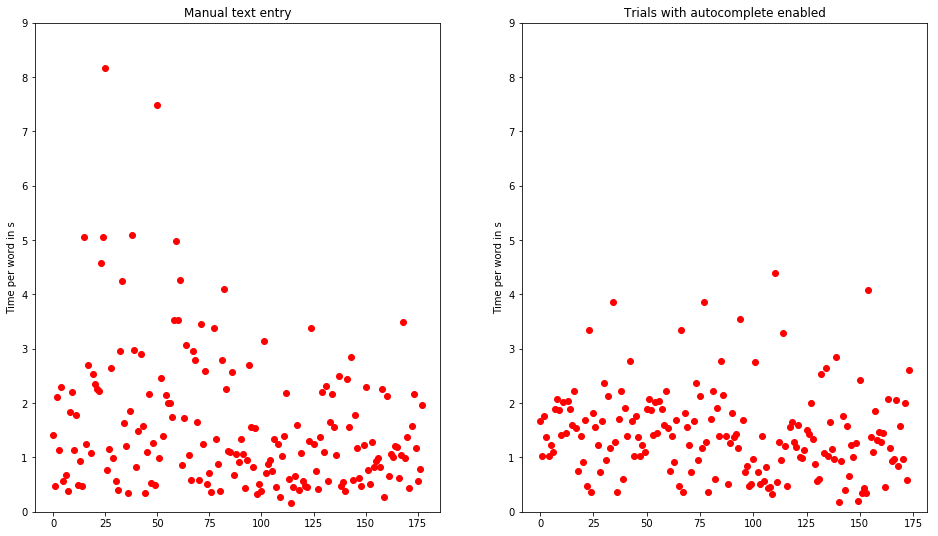

In [150]:

graph = plt.figure()

ordinate_manual = range(len(data_manual))
ordinate_auto = range(len(data_auto))

plot_11 = graph.add_subplot(121)
plot_11.scatter(ordinate_manual, list(data_manual["current_word_time"]), c="r") 
plot_11.title.set_text("Manual text entry")
plot_11.set_ylabel("Time per word in s")
plot_11.set_ylim([0, 9])
                   
plot_12 = graph.add_subplot(122)
plot_12.scatter(ordinate_auto, list(data_auto["current_word_time"]), c="r") 
plot_12.title.set_text("Trials with autocomplete enabled")
plot_12.set_ylabel("Time per word in s")
plot_12.set_ylim([0, 9])



As can be seen from the Scatterplot, both stimuli look similar but manual text typing produces heavy outliers.
 The more detailed analysis using boxplots reassures this. The average time of entering a word is around 1.3 seconds

### Boxplot


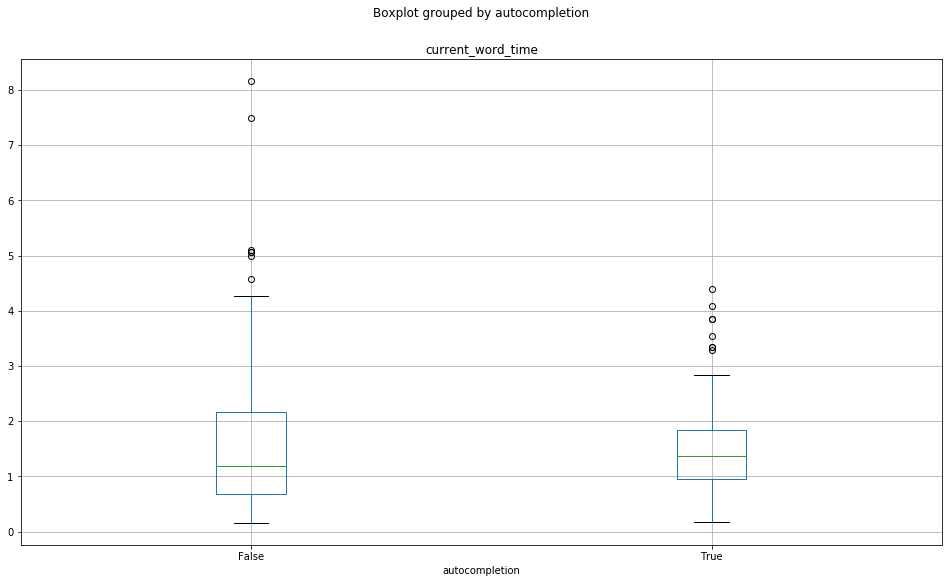

In [151]:
data_words.boxplot(column="current_word_time", by="autocompletion")


Out of 174 word, only 50 weren’t typed without the auto complete feature, indicating a good user reception of the 
feature

### Piechart


[50, 124]


(-1.1102786402036586,
 1.1156174992513634,
 -1.1178367860926188,
 1.1008493707663152)

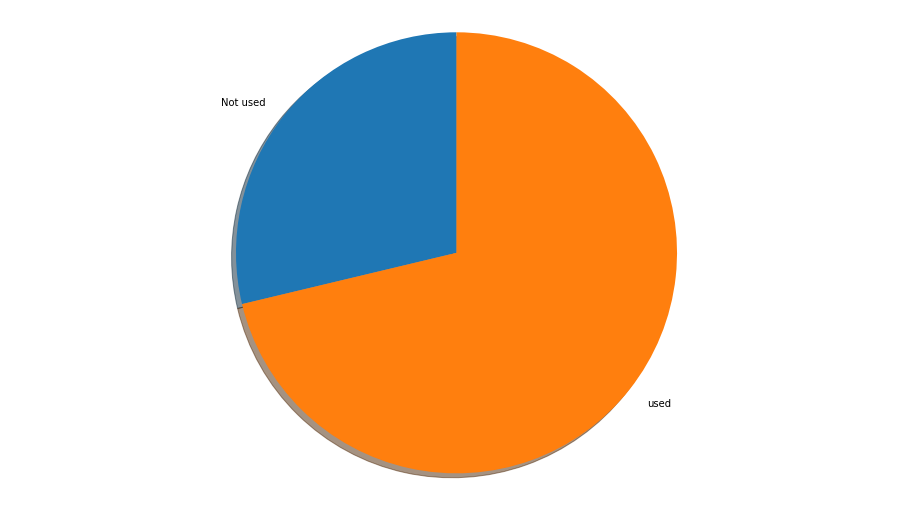

In [152]:
# number of autocompletion usage

data_auto_used = frame[(frame["autocompletion"] == True)  & (frame["event_type"] == "word typed") & (frame["technique_used"] == "True")] 
data_auto_not_used = frame[(frame["autocompletion"] == True)  & (frame["event_type"] == "word typed") & (frame["technique_used"] == "False")] 

data = [len(data_auto_not_used.index), len(data_auto_used.index)]
labels = ["Not used", "used"]

print(data);

fig, pie_graph = plt.subplots()
pie_graph.pie(data, labels=labels,
        shadow=True, 
        startangle=90)
pie_graph.axis('equal')



In [153]:
# t-test
t_statistic_1, p_value_1 = ttest_rel(data_auto["current_word_time"], data_manual["current_word_time"])
print("p-value: %2.30f" %(p_value_1))



ValueError: unequal length arrays

A final students t-test could not be conducted. As no errors are logged, corrections can trigger the word
finished event multiple times (174 words for auto complete, 178 words for manual).  

Written by Christoph Tögel


